# Preprocessing

### 1. Add week and city column

In [347]:
import pandas as pd

# Weekdays

# amsterdam
ams_wk = pd.read_csv('./datasets/amsterdam_weekdays.csv', index_col=0)
ams_wk['weekday'] = True
ams_wk['city'] = 'amsterdam'

# athens
ath_wk = pd.read_csv('./datasets/athens_weekdays.csv', index_col=0)
ath_wk['weekday'] = True
ath_wk['city'] = 'athens'

# barcelona
bar_wk = pd.read_csv('./datasets/barcelona_weekdays.csv', index_col=0)
bar_wk['weekday'] = True
bar_wk['city'] = 'barcelona'

# berlin
ber_wk = pd.read_csv('./datasets/berlin_weekdays.csv', index_col=0)
ber_wk['weekday'] = True
ber_wk['city'] = 'berlin'

# budapest
bud_wk = pd.read_csv('./datasets/budapest_weekdays.csv', index_col=0)
bud_wk['weekday'] = True
bud_wk['city'] = 'budapest'

# lisbon
lis_wk = pd.read_csv('./datasets/lisbon_weekdays.csv', index_col=0)
lis_wk['weekday'] = True
lis_wk['city'] = 'lisbon'

# london
lon_wk = pd.read_csv('./datasets/london_weekdays.csv', index_col=0)
lon_wk['weekday'] = True
lon_wk['city'] = 'london'

# paris
par_wk = pd.read_csv('./datasets/paris_weekdays.csv', index_col=0)
par_wk['weekday'] = True
par_wk['city'] = 'paris'

# rome
rom_wk = pd.read_csv('./datasets/rome_weekdays.csv', index_col=0)
rom_wk['weekday'] = True
rom_wk['city'] = 'rome'

# vienna
vie_wk = pd.read_csv('./datasets/vienna_weekdays.csv', index_col=0)
vie_wk['weekday'] = True
vie_wk['city'] = 'vienna'

In [348]:
# Weekends

# amsterdam
ams_wkd = pd.read_csv('./datasets/amsterdam_weekends.csv', index_col=0)
ams_wkd['weekday'] = False
ams_wkd['city'] = 'amsterdam'

# athens
ath_wkd = pd.read_csv('./datasets/athens_weekends.csv', index_col=0)
ath_wkd['weekday'] = False
ath_wkd['city'] = 'athens'

# barcelona
bar_wkd = pd.read_csv('./datasets/barcelona_weekends.csv', index_col=0)
bar_wkd['weekday'] = False
bar_wkd['city'] = 'barcelona'

# berlin
ber_wkd = pd.read_csv('./datasets/berlin_weekends.csv', index_col=0)
ber_wkd['weekday'] = False
ber_wkd['city'] = 'berlin'

# budapest
bud_wkd = pd.read_csv('./datasets/budapest_weekends.csv', index_col=0)
bud_wkd['weekday'] = False
bud_wkd['city'] = 'budapest'

# lisbon
lis_wkd = pd.read_csv('./datasets/lisbon_weekends.csv', index_col=0)
lis_wkd['weekday'] = False
lis_wkd['city'] = 'lisbon'

# london
lon_wkd = pd.read_csv('./datasets/london_weekends.csv', index_col=0)
lon_wkd['weekday'] = False
lon_wkd['city'] = 'london'

# paris
par_wkd = pd.read_csv('./datasets/paris_weekends.csv', index_col=0)
par_wkd['weekday'] = False
par_wkd['city'] = 'paris'

# rome
rom_wkd = pd.read_csv('./datasets/rome_weekends.csv', index_col=0)
rom_wkd['weekday'] = False
rom_wkd['city'] = 'rome'

# vienna
vie_wkd = pd.read_csv('./datasets/vienna_weekends.csv', index_col=0)
vie_wkd['weekday'] = False
vie_wkd['city'] = 'vienna'

### Data sources that might be useful

Nights spent at tourist accommodation establishments
https://ec.europa.eu/eurostat/databrowser/view/tour_occ_ninat/default/table?lang=en&category=tour.tour_inda.tour_occ.tour_occ_n

Various index
https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2023&region=150&displayColumn=5

GDP Ranking
https://datacatalog.worldbank.org/search/dataset/0038130

### 2. Combine datasets / Renaming latitude and longitude

In [349]:
house_dataset = pd.concat([ams_wk, ath_wk, bar_wk, ber_wk, bud_wk, lis_wk, lon_wk, par_wk, rom_wk, vie_wk, ams_wkd, ath_wkd, bar_wkd, ber_wkd, bud_wkd, lis_wkd, lon_wkd, par_wkd, rom_wkd, vie_wkd], ignore_index=True)

In [350]:

# Rename columns
house_dataset = house_dataset.rename(columns={
    'lng': 'longitude',
    'lat': 'latitude'
})

### 3. Checking null

In [351]:
# Checking null values

null_counts = house_dataset.isnull().sum()
print(null_counts)

null_data = house_dataset[house_dataset.isnull().any(axis=1)]
print(null_data)

# Checking unique values for categorical property
room_type = house_dataset['room_type'].unique()
print(room_type)

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
longitude                     0
latitude                      0
weekday                       0
city                          0
dtype: int64
Empty DataFrame
Columns: [realSum, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, longitude, latitude, weekday, city]
Index: []

[0 rows x 21 

In [352]:
# house_dataset.to_csv('./house_dataset.csv', index=False)

In [353]:
unique_values = house_dataset['city'].value_counts()
unique_values

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

### 4. Data Type Checking

In [354]:
house_dataset.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
longitude                     float64
latitude                      float64
weekday                          bool
city                           object
dtype: object

In [355]:
from sklearn.preprocessing import LabelEncoder

# object encoding
label_encoder_room_type = LabelEncoder()
house_dataset['room_type_encoded'] = label_encoder_room_type.fit_transform(house_dataset['room_type'])

label_encoder_city = LabelEncoder()
house_dataset['city_encoded'] = label_encoder_room_type.fit_transform(house_dataset['city'])

# boolean encoding
house_dataset['room_shared_numeric'] = house_dataset['room_shared'].astype(int)
house_dataset['room_private_numeric'] = house_dataset['room_private'].astype(int)
house_dataset['host_is_superhost_numeric'] = house_dataset['host_is_superhost'].astype(int)
house_dataset['weekday_numeric'] = house_dataset['weekday'].astype(int)

# drop columns
house_dataset = house_dataset.drop(columns=['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'])

In [356]:
# house_dataset.to_csv('./house_dataset1.csv', index=False)

### 5. Adding features

In [357]:
# cost of living plus rent index 2023
house_dataset.loc[house_dataset['city'].str.contains('amsterdam', case=False, na=False), 'costliving2023'] = 51.7
house_dataset.loc[house_dataset['city'].str.contains('athens', case=False, na=False), 'costliving2023'] = 34.6
house_dataset.loc[house_dataset['city'].str.contains('barcelona', case=False, na=False), 'costliving2023'] = 36.7
house_dataset.loc[house_dataset['city'].str.contains('berlin', case=False, na=False), 'costliving2023'] = 45.3
house_dataset.loc[house_dataset['city'].str.contains('budapest', case=False, na=False), 'costliving2023'] = 26.0
house_dataset.loc[house_dataset['city'].str.contains('lisbon', case=False, na=False), 'costliving2023'] = 34.1
house_dataset.loc[house_dataset['city'].str.contains('london', case=False, na=False), 'costliving2023'] = 46.6
house_dataset.loc[house_dataset['city'].str.contains('paris', case=False, na=False), 'costliving2023'] = 47.5
house_dataset.loc[house_dataset['city'].str.contains('rome', case=False, na=False), 'costliving2023'] = 41.7
house_dataset.loc[house_dataset['city'].str.contains('vienna', case=False, na=False), 'costliving2023'] = 45.4

# cost of living plus rent index 2024
house_dataset.loc[house_dataset['city'].str.contains('amsterdam', case=False, na=False), 'costliving2024'] = 50.2
house_dataset.loc[house_dataset['city'].str.contains('athens', case=False, na=False), 'costliving2024'] = 34.9
house_dataset.loc[house_dataset['city'].str.contains('barcelona', case=False, na=False), 'costliving2024'] = 36.6
house_dataset.loc[house_dataset['city'].str.contains('berlin', case=False, na=False), 'costliving2024'] = 45.4
house_dataset.loc[house_dataset['city'].str.contains('budapest', case=False, na=False), 'costliving2024'] = 28.2
house_dataset.loc[house_dataset['city'].str.contains('lisbon', case=False, na=False), 'costliving2024'] = 36.5
house_dataset.loc[house_dataset['city'].str.contains('london', case=False, na=False), 'costliving2024'] = 49.4
house_dataset.loc[house_dataset['city'].str.contains('paris', case=False, na=False), 'costliving2024'] = 45.3
house_dataset.loc[house_dataset['city'].str.contains('rome', case=False, na=False), 'costliving2024'] = 41.0
house_dataset.loc[house_dataset['city'].str.contains('vienna', case=False, na=False), 'costliving2024'] = 46.4


# GDP
house_dataset.loc[house_dataset['city'].str.contains('amsterdam', case=False, na=False), 'gdp'] = 17
house_dataset.loc[house_dataset['city'].str.contains('athens', case=False, na=False), 'gdp'] = 54
house_dataset.loc[house_dataset['city'].str.contains('barcelona', case=False, na=False), 'gdp'] = 15
house_dataset.loc[house_dataset['city'].str.contains('berlin', case=False, na=False), 'gdp'] = 3
house_dataset.loc[house_dataset['city'].str.contains('budapest', case=False, na=False), 'gdp'] = 56
house_dataset.loc[house_dataset['city'].str.contains('lisbon', case=False, na=False), 'gdp'] = 48
house_dataset.loc[house_dataset['city'].str.contains('london', case=False, na=False), 'gdp'] = 	6
house_dataset.loc[house_dataset['city'].str.contains('paris', case=False, na=False), 'gdp'] = 	7
house_dataset.loc[house_dataset['city'].str.contains('rome', case=False, na=False), 'gdp'] = 	8
house_dataset.loc[house_dataset['city'].str.contains('vienna', case=False, na=False), 'gdp'] = 	26


In [358]:
# house_dataset.to_csv('./house_dataset2.csv', index=False)

### 6. Remove Outliers


Q1: 148.75217370869953
Q3: 319.69428651318856
IQR: 170.94211280448903
Lower Bound: -107.660995498034
Upper Bound: 576.1074557199221


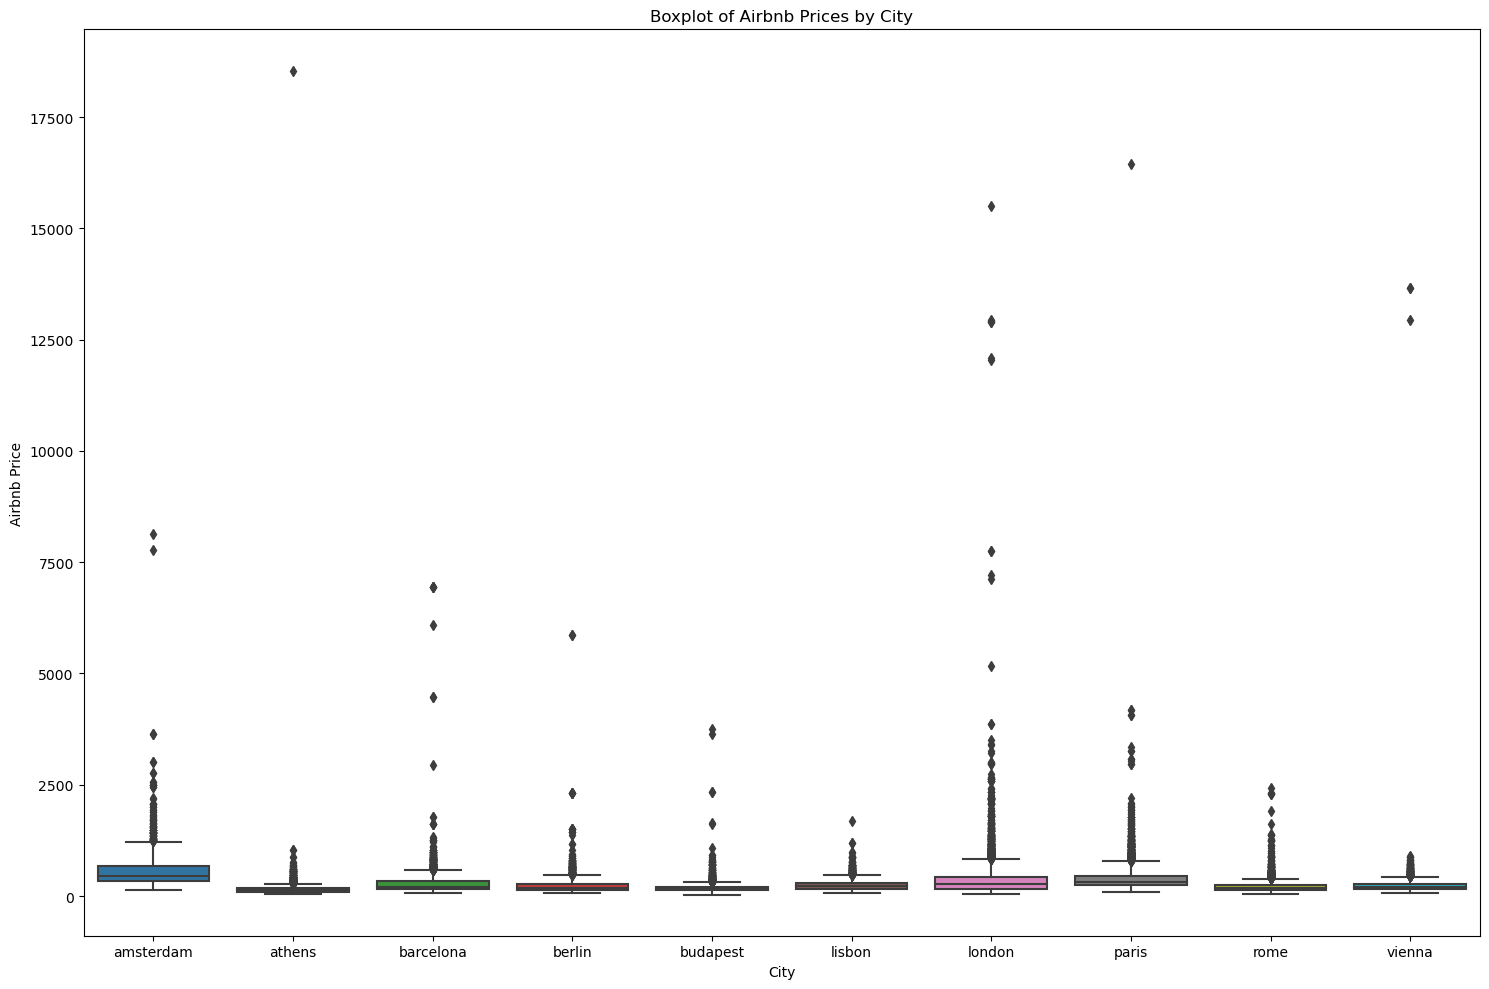

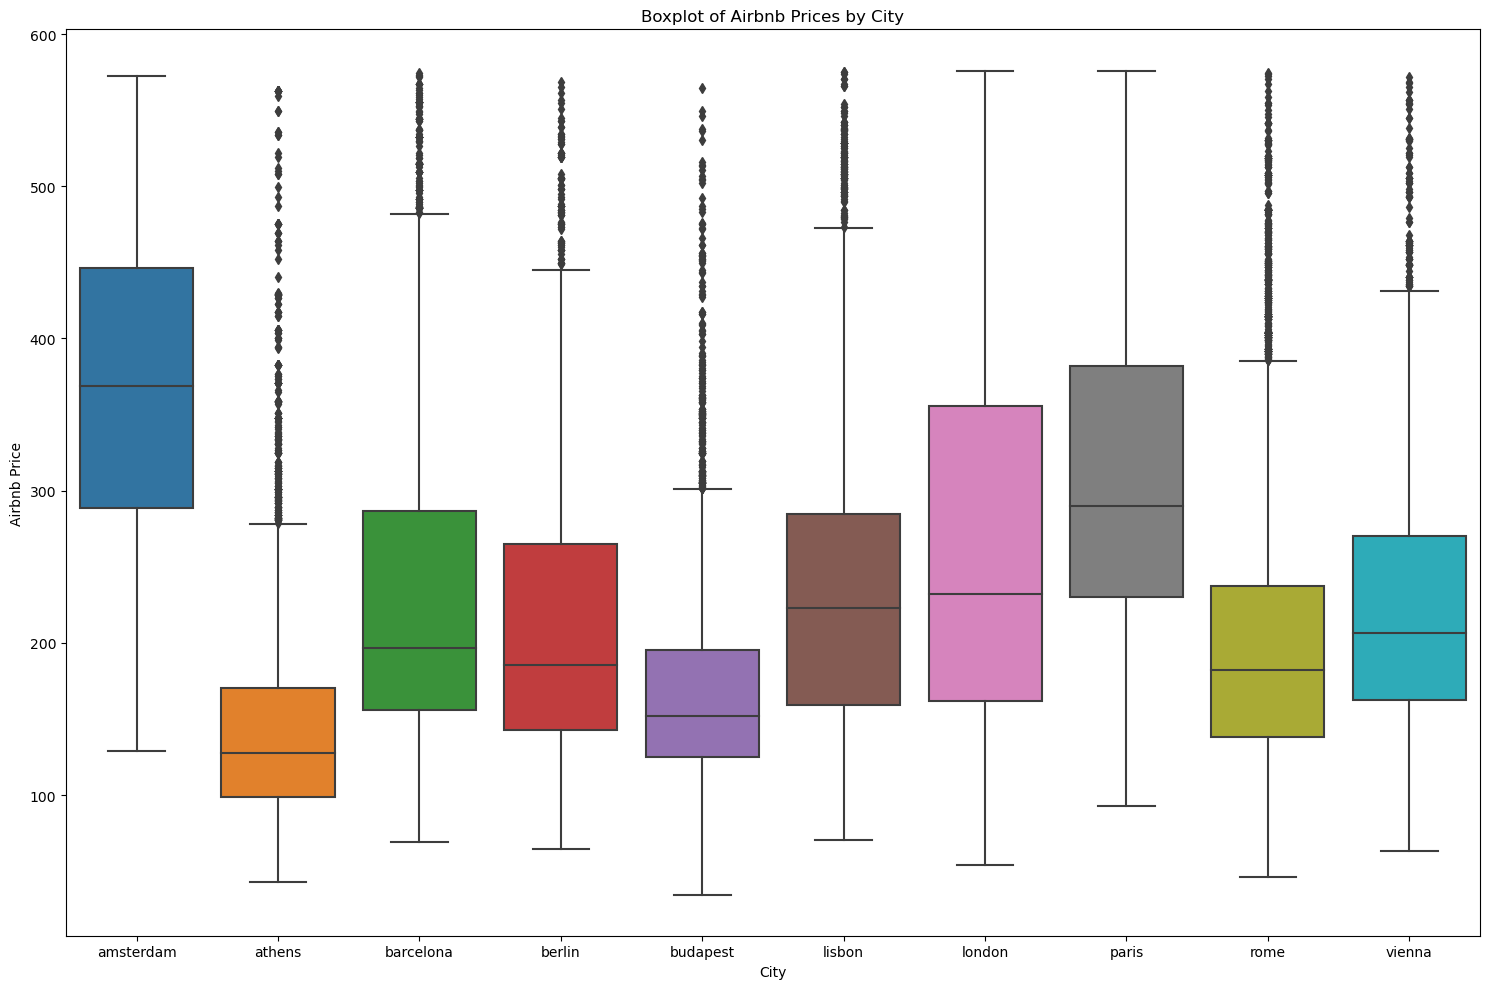

In [359]:
import pandas as pd

Q1 = house_dataset['realSum'].quantile(0.25)
Q3 = house_dataset['realSum'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# 상한과 하한 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nQ1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot before removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(x='city', y='realSum', data=house_dataset)

# Title and label
plt.title('Boxplot of Airbnb Prices by City')
plt.xlabel('City')
plt.ylabel('Airbnb Price')

plt.tight_layout()  # Layout
plt.show()

# Remove Outlier
house_dataset = house_dataset[(house_dataset['realSum'] >= lower_bound) & (house_dataset['realSum'] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(x='city', y='realSum', data=house_dataset)

# Title and label
plt.title('Boxplot of Airbnb Prices by City')
plt.xlabel('City')
plt.ylabel('Airbnb Price')

plt.tight_layout()  # Layout
plt.show()


In [360]:
# house_dataset.to_csv('./house_dataset3.csv', index=False)

### 6. Make the number of data same by each city

In [361]:
# Checking the number of data by each city
city_counts = house_dataset['city'].value_counts()
print("\nCity Counts:")
print(city_counts)


City Counts:
rome         8940
london       8661
paris        5709
lisbon       5696
athens       5254
budapest     3980
vienna       3483
barcelona    2602
berlin       2380
amsterdam    1340
Name: city, dtype: int64


In [362]:
# Checking minimum number of data by each city
min_count = city_counts.min()

# Sampling according the minimum number
house_dataset = house_dataset.groupby('city').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

In [363]:
city_counts = house_dataset['city'].value_counts()
city_counts

amsterdam    1340
athens       1340
barcelona    1340
berlin       1340
budapest     1340
lisbon       1340
london       1340
paris        1340
rome         1340
vienna       1340
Name: city, dtype: int64

In [364]:
# house_dataset.to_csv('./house_dataset4.csv', index=False)